<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/sklearn_exercise/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm import tqdm

In [6]:
torch.cuda.is_available()

True

In [7]:
mean = 0.5
sigma = 0.5
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([mean], [sigma])])

In [61]:
train_set = datasets.MNIST(root='./data', download=True, train=True, transform=transform)
test_set = datasets.MNIST(root='./data', download=True, train=False, transform=transform)

In [65]:
print('number of training set :', len(train_set))
print('number of test set :', len(test_set))

number of training set : 60000
number of test set : 10000


In [64]:
train_loader = DataLoader(dataset = train_set, batch_size=100, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset = test_set, batch_size=100, shuffle=True, num_workers=2)

In [66]:
class NewModel(nn.Module):
    def __init__(self, D_in, H_1, H_2, D_out):
        super(NewModel, self).__init__()
        self.layer1 = nn.Linear(D_in, H_1)
        self.layer2 = nn.Linear(H_1, H_2)
        self.layer3 = nn.Linear(H_2, D_out)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [40]:
train_iter = iter(train_loader)
image, label = train_iter.next()
image.shape

torch.Size([100, 1, 28, 28])

In [67]:
model = NewModel(784, 125, 64, 10)

In [89]:
running_loss_history = []
running_correct_history = []
valid_loss_history = []
valid_correct_history = []

In [78]:
criterion = nn.CrossEntropyLoss()

In [91]:
optimizer = optim.Adam(params=model.parameters(), lr = 0.0005)

In [92]:
epoch = 12
for i in tqdm(range(epoch)):
    
    running_loss, valid_loss = 0.0, 0.0
    running_correct, valid_correct = 0.0, 0.0

    for train_input, train_label in train_loader:
        train_input = train_input.view(train_input.shape[0], -1)
        train_output = model.forward(train_input)
        # caculating loss
        loss = criterion(train_output, train_label)
        # initialize gradient
        optimizer.zero_grad()
        # backpropagation
        loss.backward()
        # update weight
        optimizer.step()
        _, running_pred = torch.max(train_output, 1)
        # get total loss, total correction in one epoch
        running_loss += loss.item()
        running_correct += torch.sum(running_pred == train_label.data)
    
    avg_running_loss = running_loss/len(train_loader)
    running_loss_history.append(avg_running_loss)

    avg_running_correct = running_correct/len(train_loader)
    running_correct_history.append(avg_running_correct)

    with torch.no_grad():
        for valid_input, valid_label in test_loader:
            valid_input = valid_input.view(valid_input.shape[0], -1)
            valid_output = model(valid_input)
            v_loss = criterion(valid_output, valid_label)
            _, valid_pred = torch.max(valid_output, 1)

            valid_loss += v_loss.item()
            valid_correct += torch.sum(valid_pred == valid_label.data)

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(avg_valid_loss)

        avg_valid_correct = valid_correct/len(test_loader)
        valid_correct_history.append(avg_valid_correct)
    
    print('{0} epoch / train_loss : {1:.7f}, train_score : {2:.7f}, valid_loss : {3:.7f}, valid_score : {4:.7f}'.format(i+1, avg_running_loss, avg_running_correct, avg_valid_loss, avg_valid_correct))



  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:12<02:18, 12.62s/it]

1 epoch / train_loss : 0.0150848, train_score : 99.4950027, valid_loss : 0.0913767, valid_score : 97.8300018




 17%|█▋        | 2/12 [00:25<02:06, 12.60s/it]

2 epoch / train_loss : 0.0149306, train_score : 99.5016632, valid_loss : 0.0991672, valid_score : 97.9100037




 25%|██▌       | 3/12 [00:37<01:53, 12.60s/it]

3 epoch / train_loss : 0.0098302, train_score : 99.6783371, valid_loss : 0.0991900, valid_score : 97.8499985




 33%|███▎      | 4/12 [00:50<01:40, 12.62s/it]

4 epoch / train_loss : 0.0092563, train_score : 99.6900024, valid_loss : 0.1062496, valid_score : 97.7600021




 42%|████▏     | 5/12 [01:03<01:28, 12.66s/it]

5 epoch / train_loss : 0.0098064, train_score : 99.6733322, valid_loss : 0.1072091, valid_score : 97.7799988




 50%|█████     | 6/12 [01:15<01:16, 12.68s/it]

6 epoch / train_loss : 0.0105316, train_score : 99.6366653, valid_loss : 0.1035426, valid_score : 97.8899994




 58%|█████▊    | 7/12 [01:28<01:03, 12.66s/it]

7 epoch / train_loss : 0.0118325, train_score : 99.5983353, valid_loss : 0.1054160, valid_score : 97.7799988




 67%|██████▋   | 8/12 [01:41<00:50, 12.66s/it]

8 epoch / train_loss : 0.0099228, train_score : 99.6699982, valid_loss : 0.1177280, valid_score : 97.5699997




 75%|███████▌  | 9/12 [01:53<00:37, 12.65s/it]

9 epoch / train_loss : 0.0110487, train_score : 99.6133347, valid_loss : 0.1121552, valid_score : 97.6699982




 83%|████████▎ | 10/12 [02:06<00:25, 12.64s/it]

10 epoch / train_loss : 0.0065697, train_score : 99.7816696, valid_loss : 0.1078132, valid_score : 97.9100037




 92%|█████████▏| 11/12 [02:18<00:12, 12.60s/it]

11 epoch / train_loss : 0.0128356, train_score : 99.5483322, valid_loss : 0.1097379, valid_score : 97.8799973




100%|██████████| 12/12 [02:31<00:00, 12.62s/it]

12 epoch / train_loss : 0.0067579, train_score : 99.7733307, valid_loss : 0.1215448, valid_score : 97.6800003


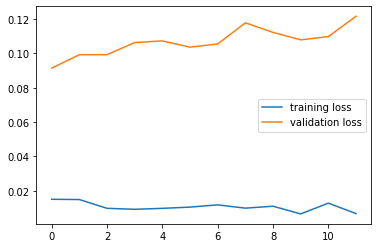

In [93]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(valid_loss_history, label = 'validation loss')
plt.legend()

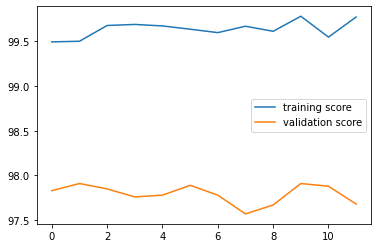

In [94]:
plt.plot(running_correct_history, label = 'training score')
plt.plot(valid_correct_history, label = 'validation score')
plt.legend()

In [96]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [97]:
is_cuda

True

In [98]:
device

device(type='cuda')

In [100]:
model = model.to(device)

In [107]:
optimizer2 = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [108]:
epoch = 12
for i in tqdm(range(epoch)):
    
    running_loss, valid_loss = 0.0, 0.0
    running_correct, valid_correct = 0.0, 0.0

    for train_input, train_label in train_loader:
        train_input, train_label = train_input.to(device), train_label.to(device)
        train_input = train_input.view(train_input.shape[0], -1)
        train_output = model.forward(train_input)
        # caculating loss
        loss = criterion(train_output, train_label)
        # initialize gradient
        optimizer2.zero_grad()
        # backpropagation
        loss.backward()
        # update weight
        optimizer2.step()
        _, running_pred = torch.max(train_output, 1)
        # get total loss, total correction in one epoch
        running_loss += loss.item()
        running_correct += torch.sum(running_pred == train_label.data)
    
    avg_running_loss = running_loss/len(train_loader)
    running_loss_history.append(avg_running_loss)

    avg_running_correct = running_correct/len(train_loader)
    running_correct_history.append(avg_running_correct)

    with torch.no_grad():
        for valid_input, valid_label in test_loader:
            valid_input, valid_label = valid_input.to(device), valid_label.to(device)
            valid_input = valid_input.view(valid_input.shape[0], -1)
            valid_output = model(valid_input)
            v_loss = criterion(valid_output, valid_label)
            _, valid_pred = torch.max(valid_output, 1)

            valid_loss += v_loss.item()
            valid_correct += torch.sum(valid_pred == valid_label.data)

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(avg_valid_loss)

        avg_valid_correct = valid_correct/len(test_loader)
        valid_correct_history.append(avg_valid_correct)
    
    print('{0} epoch / train_loss : {1:.7f}, train_score : {2:.7f}, valid_loss : {3:.7f}, valid_score : {4:.7f}'.format(i+1, avg_running_loss, avg_running_correct, avg_valid_loss, avg_valid_correct))



  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:11<02:11, 11.91s/it]

1 epoch / train_loss : 0.0290086, train_score : 99.0166702, valid_loss : 0.1273483, valid_score : 97.5000000




 17%|█▋        | 2/12 [00:23<01:59, 11.90s/it]

2 epoch / train_loss : 0.0250473, train_score : 99.1650009, valid_loss : 0.1461701, valid_score : 97.2999954




 25%|██▌       | 3/12 [00:35<01:46, 11.88s/it]

3 epoch / train_loss : 0.0238507, train_score : 99.1633377, valid_loss : 0.1265801, valid_score : 97.6699982




 33%|███▎      | 4/12 [00:47<01:34, 11.82s/it]

4 epoch / train_loss : 0.0297715, train_score : 98.9816666, valid_loss : 0.1160636, valid_score : 97.9399948




 42%|████▏     | 5/12 [00:59<01:22, 11.82s/it]

5 epoch / train_loss : 0.0226930, train_score : 99.2500000, valid_loss : 0.1335653, valid_score : 97.2500000




 50%|█████     | 6/12 [01:10<01:10, 11.82s/it]

6 epoch / train_loss : 0.0262312, train_score : 99.1066666, valid_loss : 0.1277186, valid_score : 97.4899979




 58%|█████▊    | 7/12 [01:22<00:59, 11.84s/it]

7 epoch / train_loss : 0.0213928, train_score : 99.2866669, valid_loss : 0.1303673, valid_score : 97.5000000




 67%|██████▋   | 8/12 [01:34<00:47, 11.82s/it]

8 epoch / train_loss : 0.0285677, train_score : 99.0500031, valid_loss : 0.1198552, valid_score : 97.6599960




 75%|███████▌  | 9/12 [01:46<00:35, 11.85s/it]

9 epoch / train_loss : 0.0188127, train_score : 99.3283386, valid_loss : 0.1277688, valid_score : 97.4599991




 83%|████████▎ | 10/12 [01:58<00:23, 11.84s/it]

10 epoch / train_loss : 0.0237248, train_score : 99.2166672, valid_loss : 0.1319293, valid_score : 97.5400009




 92%|█████████▏| 11/12 [02:10<00:11, 11.84s/it]

11 epoch / train_loss : 0.0204952, train_score : 99.3033371, valid_loss : 0.1246201, valid_score : 97.8399963




100%|██████████| 12/12 [02:21<00:00, 11.83s/it]

12 epoch / train_loss : 0.0238423, train_score : 99.1733322, valid_loss : 0.1462346, valid_score : 97.2099991


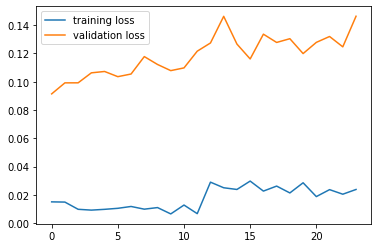

In [109]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(valid_loss_history, label = 'validation loss')
plt.legend()

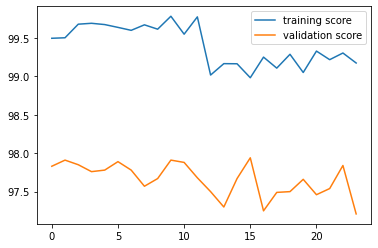

In [110]:
plt.plot(running_correct_history, label = 'training score')
plt.plot(valid_correct_history, label = 'validation score')
plt.legend()

In [113]:
torch.cuda.current_device()

0

In [114]:
torch.cuda.device_count()

1

In [117]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [118]:
torch.cuda.get_device_capability(0)

(7, 5)